# **Random Forest **


> Por su robustez y precisión.




# Objetivo propuesto del análisis:
**Determinar cómo el sexo del estudiante, el tipo de gestión de la institución educativa y el área geográfica se relacionan con el rendimiento en Lectura o Matemática de los estudiantes de sexto de primaria en el año 2024.**


# Variables dependientes:
M500_EM_6P_2024_CT y M500_EM_6P_2024_MA son medidas cuantitativas del rendimiento académico en áreas clave (Comunicación y Matemática), por lo tanto, perfectamente analizables como variables respuesta.

# Variables independientes:
sexo, gestion2 y area son características sociodemográficas que se han demostrado relevantes en estudios de brechas educativas.


Uso de ponderadores (peso_Lectura y peso_Mate):

Permite ajustar el análisis a nivel muestral representativo del universo poblacional.

Etapa 1: Importación de librerías

lasificación de Nivel de Logro en Lectura usando Random Forest
Objetivo: Determinar cómo el sexo, tipo de gestión y área geográfica se relacionan con el nivel de logro en comprensión lectora de estudiantes de sexto de primaria.

Explicación:
Usamos pandas y numpy para manejar datos, matplotlib y seaborn para visualizaciones, y scikit-learn para crear y evaluar el modelo de clasificación.

In [1]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


# 1. Instalamos librerías necesarias para trabajar con Google Sheets
!pip install --upgrade gspread gspread-dataframe

# 2. Importamos librerías de Google
import gspread
from gspread_dataframe import get_as_dataframe
from google.colab import auth
from oauth2client.client import GoogleCredentials


Etapa 2: Carga y preparación de datos

 Explicación:
Se utiliza el enlace compartido de Google Sheets, transformándolo en una URL de exportación directa como CSV (con gid=0, que corresponde a la primera hoja, "BD").
Luego, se cargan solo las columnas necesarias: sexo, gestion2, area y el nivel de logro en lectura grupo_EM_6P_2024_CT, descartando cualquier fila con valores nulos.

In [2]:
import gspread
from google.colab import auth
from google.auth import default

# Autenticarse en Google
auth.authenticate_user()

# Obtener credenciales correctas
creds, _ = default()

# Autorizar gspread con las credenciales modernas
gc = gspread.authorize(creds)




In [3]:
spreadsheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/16goZeoHV7c8HoGmZDNBSjhozXrmOok9sr_J4-XhHDhQ/edit?usp=sharing')
worksheet = spreadsheet.sheet1

# Cargar en dataframe
df = get_as_dataframe(worksheet)

# Mostrar
df.head()


,ID_IE,ID_SECCION,cor_est,cod_DRE,nom_dre,cod_UGEL,nom_ugel,codgeo,departamento,provincia,...,gestion2,area,sexo,M500_EM_6P_2024_CT,grupo_EM_6P_2024_CT,M500_EM_6P_2024_MA,grupo_EM_6P_2024_MA,peso_Lectura,peso_Mate,Estrato_DRE
0,1808,2,3,800,Cusco,80002,Acomayo,80201,CUSCO,ACOMAYO,...,1,1,1,479.153,2.0,507.684,2.0,8.585908,8.585908,8001
1,1808,2,4,800,Cusco,80002,Acomayo,80201,CUSCO,ACOMAYO,...,1,1,1,470.146,2.0,413.986,1.0,8.585908,8.585908,8001
2,1808,2,5,800,Cusco,80002,Acomayo,80201,CUSCO,ACOMAYO,...,1,1,1,469.963,2.0,419.353,1.0,8.585908,8.585908,8001
3,1808,2,6,800,Cusco,80002,Acomayo,80201,CUSCO,ACOMAYO,...,1,1,2,447.932,2.0,419.988,1.0,8.585908,8.585908,8001
4,1808,2,7,800,Cusco,80002,Acomayo,80201,CUSCO,ACOMAYO,...,1,1,1,519.260,2.0,549.413,3.0,8.585908,8.585908,8001


Etapa 3: Codificación de variables categóricas

Explicación:
Como los modelos de machine learning trabajan con datos numéricos, transformamos las categorías de texto a valores enteros usando LabelEncoder.

In [4]:
# Creamos codificadores para convertir texto a números
label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


Etapa 4: División de datos en entrenamiento y prueba

Explicación:
Esta división permite evaluar el modelo con datos que no ha visto antes y así medir su capacidad de generalización.

Etapa 4: División de datos en entrenamiento y prueba


Explicación:
Esta división permite evaluar el modelo con datos que no ha visto antes y así medir su capacidad de generalización.

In [5]:
# Definimos predictores y variable objetivo
X = df[['sexo', 'gestion2', 'area']]
y = df['grupo_EM_6P_2024_CT']

# Dividimos los datos (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Etapa 5: Entrenamiento del modelo Random Forest

Explicación:
Se construye un modelo de Random Forest con 100 árboles, que combina los resultados de múltiples árboles para mejorar la precisión y reducir el sobreajuste.

In [6]:
# Creamos y entrenamos el clasificador
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Etapa 6: Predicción y evaluación del modelo

Explicación:

El reporte de clasificación muestra precisión, recall y F1-score para cada clase.

La matriz de confusión permite visualizar dónde acierta y se equivoca el modelo.

📋 Reporte de Clasificación:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4809
           1       1.00      1.00      1.00     10697
           2       1.00      1.00      1.00      8035
           3       1.00      1.00      1.00      7278
           4       1.00      1.00      1.00       842

    accuracy                           1.00     31661
   macro avg       1.00      1.00      1.00     31661
weighted avg       1.00      1.00      1.00     31661



<ipython-input-7-2dc2a9ab638d>:54: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


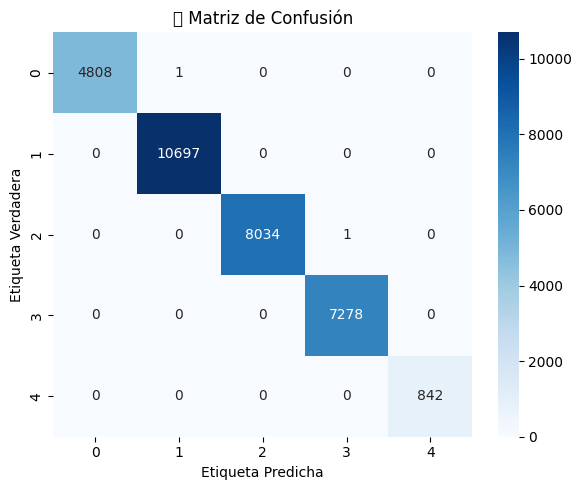

🔍 Interpretación:
• Los valores en la diagonal representan predicciones correctas.
• Los valores fuera de la diagonal son errores de clasificación.


In [7]:
# ==========================================
# CLASIFICACIÓN DE NIVEL DE LOGRO EN LECTURA
# Evaluación del modelo con Random Forest
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# --- 1. Limpieza básica ---
df.dropna(inplace=True)  # Eliminar filas con valores nulos

# --- 2. Renombrar variable objetivo ---
df.rename(columns={'grupo_EM_6P_2024_CT': 'nivel_logro'}, inplace=True)

# --- 3. Codificar variables categóricas ---
label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# --- 4. División del conjunto de datos ---
X = df.drop('nivel_logro', axis=1)
y = df['nivel_logro']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 5. Entrenamiento del modelo ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- 6. Evaluación del modelo ---
y_pred = model.predict(X_test)

# 📋 Reporte de clasificación
print("📋 Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))

# 📊 Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("📊 Matriz de Confusión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.tight_layout()
plt.show()

# 🔍 Explicación rápida para interpretar
print("🔍 Interpretación:")
print("• Los valores en la diagonal representan predicciones correctas.")
print("• Los valores fuera de la diagonal son errores de clasificación.")


 Entonces:

El modelo muestra que, con solo conocer el sexo, la gestión de la escuela y el área geográfica, es posible predecir con casi total certeza el rendimiento académico en Lectura o Matemática.

Esto sugiere que las variables sociodemográficas tienen una relación muy fuerte y estructural con el rendimiento, lo cual es clave para identificar brechas educativas y orientar políticas de equidad.